In [1]:
# imoprt libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from glob import glob # allows us to list all files to a directory
# import IPython
# import IPython.display as ipd # to play the Audio Files

# import librosa # main package for working with Audio Data
# import librosa.display
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as Pipe
pd.options.display.max_columns = None
pd.options.display.max_rows = None

/Users/hongyuren/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
!pip install lazypredict

  Using cached numpy-1.22.4-cp39-cp39-macosx_10_15_x86_64.whl (17.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.


In [4]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [5]:
# import labelencoder and scaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

In [6]:
rng=2023

In [7]:
def data_quality(df):
    
    # find datatype of each column
    data_types = pd.DataFrame(df.dtypes, columns=['Data Type'])

    # count number of missing observations by column
    missing_data_counts = pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])

    # count number of present observations by column
    present_data_counts = pd.DataFrame(df.count(), columns=['Present Values'])

    # count number of unique observations by column
    unique_value_counts = pd.DataFrame(columns=['Unique Values'])
    for v in list(df.columns.values):       
        unique_value_counts.loc[v] = [df[v].nunique()]

    data_quality_report = pd.concat([present_data_counts, missing_data_counts, unique_value_counts], axis=1)
    return data_quality_report

In [8]:
df = pd.read_csv("3593_song_newfeatures_genre_dataset.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3593 non-null   int64  
 1   id                      3593 non-null   object 
 2   spectral_centroid_mean  3593 non-null   float64
 3   spectral_centroid_dev   3593 non-null   float64
 4   rolloff_point_mean      3593 non-null   float64
 5   rolloff_point_dev       3593 non-null   float64
 6   flux_mean               3593 non-null   float64
 7   flux_dev                3593 non-null   float64
 8   variability_mean        3593 non-null   float64
 9   variability_dev         3593 non-null   float64
 10  compactness_mean        3593 non-null   float64
 11  compactness_dev         3593 non-null   float64
 12  rms_mean                3593 non-null   float64
 13  rms_dev                 3593 non-null   float64
 14  low_energy_window_mean  3593 non-null   

In [10]:
df.head()

,Unnamed: 0,id,spectral_centroid_mean,spectral_centroid_dev,rolloff_point_mean,rolloff_point_dev,flux_mean,flux_dev,variability_mean,variability_dev,compactness_mean,compactness_dev,rms_mean,rms_dev,low_energy_window_mean,low_energy_window_dev,zero_crossing_mean,zero_crossing_dev,title,genre
0,0,TRBGMOG128F92D75BD,10.30,5.09,0.07,0.05,0.01,0.01,0.01,0.00,1591.00,186.80,0.25,0.08,0.58,0.06,32.60,13.10,b'Kicking And Screaming',Pop_Rock
1,1,TRBGMXY128F92FC2B2,10.30,9.55,0.07,0.08,0.00,0.00,0.00,0.00,1609.00,212.80,0.17,0.08,0.61,0.05,29.88,23.70,b'Black Connect 3',Rap
2,2,TRBGMAW128F4231326,10.68,6.05,0.07,0.04,0.00,0.00,0.00,0.00,1735.00,265.20,0.08,0.07,0.57,0.09,26.56,14.11,b'Terraplane Blues',Country
3,3,TRBGMAZ12903CC3707,8.50,6.65,0.05,0.05,0.00,0.00,0.00,0.00,1665.00,270.70,0.16,0.10,0.57,0.07,24.18,17.22,"b""L'idole des femmes""",Pop_Rock
4,4,TRBGWQG128F92FB42D,17.04,9.34,0.12,0.07,0.00,0.00,0.00,0.00,1629.00,201.10,0.12,0.05,0.58,0.07,46.94,18.85,b'Take The Time',Pop_Rock


In [11]:
data_quality(df)

,Present Values,Missing Values,Unique Values
Unnamed: 0,3593,0,3593
id,3593,0,3593
spectral_centroid_mean,3593,0,2508
spectral_centroid_dev,3593,0,2839
rolloff_point_mean,3593,0,2899
rolloff_point_dev,3593,0,2902
flux_mean,3593,0,3068
flux_dev,3593,0,3087
variability_mean,3593,0,2817
variability_dev,3593,0,2278


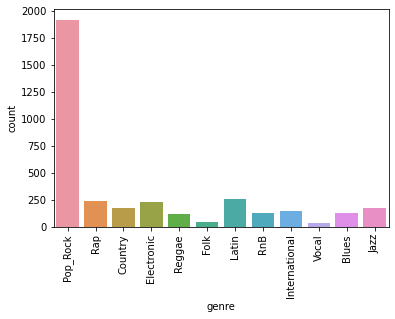

In [12]:
sns.countplot(x=df.genre) # plot the categories
plt.xticks(rotation=90);

In [13]:
# assign x and y, scale x and encode y
data = df.drop(['id','title','genre','Unnamed: 0'], axis=1)
data.head()

,spectral_centroid_mean,spectral_centroid_dev,rolloff_point_mean,rolloff_point_dev,flux_mean,flux_dev,variability_mean,variability_dev,compactness_mean,compactness_dev,rms_mean,rms_dev,low_energy_window_mean,low_energy_window_dev,zero_crossing_mean,zero_crossing_dev
0,10.30,5.09,0.07,0.05,0.01,0.01,0.01,0.00,1591.00,186.80,0.25,0.08,0.58,0.06,32.60,13.10
1,10.30,9.55,0.07,0.08,0.00,0.00,0.00,0.00,1609.00,212.80,0.17,0.08,0.61,0.05,29.88,23.70
2,10.68,6.05,0.07,0.04,0.00,0.00,0.00,0.00,1735.00,265.20,0.08,0.07,0.57,0.09,26.56,14.11
3,8.50,6.65,0.05,0.05,0.00,0.00,0.00,0.00,1665.00,270.70,0.16,0.10,0.57,0.07,24.18,17.22
4,17.04,9.34,0.12,0.07,0.00,0.00,0.00,0.00,1629.00,201.10,0.12,0.05,0.58,0.07,46.94,18.85


In [14]:
labels = df[['genre']].copy()
labels

,genre
0,Pop_Rock
1,Rap
2,Country
3,Pop_Rock
4,Pop_Rock
5,Pop_Rock
6,Pop_Rock
7,Electronic
8,Pop_Rock
9,Pop_Rock


In [15]:
data.shape, labels.shape

((3593, 16), (3593, 1))

In [16]:
type(labels)

pandas.core.frame.DataFrame

In [17]:
y = labels[['genre']].copy() #Create an extra dataframe which will be used to address only the encoded values
y['genre_encoded'] = encoder.fit_transform(labels['genre'].values) #Using values is faster than using list

In [18]:
s = y.drop_duplicates('genre')
s

,genre,genre_encoded
0,Pop_Rock,7
1,Rap,8
2,Country,1
7,Electronic,2
18,Reggae,9
20,Folk,3
28,Latin,6
29,RnB,10
31,International,4
32,Vocal,11


In [19]:
data.columns

Index(['spectral_centroid_mean', 'spectral_centroid_dev', 'rolloff_point_mean',
       'rolloff_point_dev', 'flux_mean', 'flux_dev', 'variability_mean',
       'variability_dev', 'compactness_mean', 'compactness_dev', 'rms_mean',
       'rms_dev', 'low_energy_window_mean', 'low_energy_window_dev',
       'zero_crossing_mean', 'zero_crossing_dev'],
      dtype='object')

In [20]:
continuous_vars = ['spectral_centroid_mean', 'spectral_centroid_dev', 'rolloff_point_mean',
                   'rolloff_point_dev', 'flux_mean', 'flux_dev', 'variability_mean',
                   'variability_dev', 'compactness_mean', 'compactness_dev', 'rms_mean',
                    'rms_dev', 'low_energy_window_mean', 'low_energy_window_dev',
                    'zero_crossing_mean', 'zero_crossing_dev']
X_continuous = data[continuous_vars]
X_continuous_scaled = scaler.fit_transform(X_continuous)

data[continuous_vars] = X_continuous_scaled
data.head()

,spectral_centroid_mean,spectral_centroid_dev,rolloff_point_mean,rolloff_point_dev,flux_mean,flux_dev,variability_mean,variability_dev,compactness_mean,compactness_dev,rms_mean,rms_dev,low_energy_window_mean,low_energy_window_dev,zero_crossing_mean,zero_crossing_dev
0,0.26,-0.57,0.31,-0.34,0.79,0.38,1.00,0.11,-0.44,-0.66,1.11,-0.00,0.40,0.05,0.46,-0.55
1,0.26,0.70,0.26,0.88,-0.19,-0.05,-0.11,0.00,-0.26,-0.14,-0.10,-0.01,1.12,-0.71,0.20,0.88
2,0.36,-0.29,0.12,-0.57,-1.14,-1.13,-1.32,-0.56,0.98,0.90,-1.30,-0.33,0.15,1.65,-0.11,-0.42
3,-0.21,-0.12,-0.33,-0.20,-0.60,-0.50,-0.18,0.56,0.29,1.01,-0.17,0.92,0.28,0.67,-0.34,0.01
4,2.02,0.64,1.97,0.33,-0.79,-0.80,-0.83,-0.96,-0.06,-0.37,-0.73,-0.85,0.51,0.44,1.82,0.23


In [21]:
x = data.copy()
x.shape, y.shape

((3593, 16), (3593, 2))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y['genre_encoded'],test_size=.2,random_state =rng,
                                                    stratify=y['genre_encoded'])

In [23]:
print(f"X_train:{X_train.shape}\n X_test:{X_test.shape}\n y_train:{y_train.shape} \n y_test:{y_test.shape}")

X_train:(2874, 16)
 X_test:(719, 16)
 y_train:(2874,) 
 y_test:(719,)


In [24]:
y_train.value_counts()

7     1535
6      205
8      189
2      181
1      139
5      137
4      118
10     106
0      101
9       96
3       38
11      29
Name: genre_encoded, dtype: int64

In [25]:
clf = LazyClassifier(verbose=0, custom_metric=None,random_state=rng)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|███████████████████████████████████████████| 29/29 [00:17<00:00,  1.70it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.44,0.25,None,0.46,0.01
NearestCentroid,0.26,0.20,None,0.31,0.01
BernoulliNB,0.38,0.19,None,0.38,0.02
LabelSpreading,0.44,0.19,None,0.45,0.38
LabelPropagation,0.44,0.19,None,0.44,0.24
PassiveAggressiveClassifier,0.42,0.19,None,0.42,0.04
GaussianNB,0.38,0.18,None,0.40,0.01
LinearDiscriminantAnalysis,0.54,0.18,None,0.46,2.39
KNeighborsClassifier,0.49,0.17,None,0.45,0.08


In [26]:
# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy='not majority',random_state=rng)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [27]:
print(f"X_train_smote:{X_train_smote.shape}\n y_train_smote:{y_train_smote.shape}")

X_train_smote:(18420, 16)
 y_train_smote:(18420,)


In [28]:
type(y_train_smote)

pandas.core.series.Series

In [29]:
y_train_smote.value_counts()

9     1535
1     1535
7     1535
8     1535
10    1535
4     1535
0     1535
6     1535
5     1535
2     1535
3     1535
11    1535
Name: genre_encoded, dtype: int64

In [30]:
undersample = RandomUnderSampler(random_state=rng)
X_train_rus, y_train_rus = undersample.fit_resample(X_train, y_train)

In [31]:
print(f"X_train_rus:{X_train_rus.shape}\n y_train_rus:{y_train_rus.shape}")

X_train_rus:(348, 16)
 y_train_rus:(348,)


In [32]:
y_train_rus.value_counts()

0     29
1     29
2     29
3     29
4     29
5     29
6     29
7     29
8     29
9     29
10    29
11    29
Name: genre_encoded, dtype: int64

In [33]:
clf2 = LazyClassifier(verbose=0, custom_metric=None,random_state=rng)
models2,predictions2 = clf2.fit(X_train_smote, X_test, y_train_smote, y_test)
models2

100%|███████████████████████████████████████████| 29/29 [03:18<00:00,  6.85s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.36,0.30,None,0.42,20.01
LogisticRegression,0.38,0.29,None,0.44,1.03
CalibratedClassifierCV,0.37,0.29,None,0.43,64.56
SVC,0.39,0.28,None,0.44,10.46
QuadraticDiscriminantAnalysis,0.37,0.27,None,0.42,0.03
LinearDiscriminantAnalysis,0.37,0.27,None,0.43,0.17
LGBMClassifier,0.47,0.27,None,0.49,1.50
RidgeClassifier,0.39,0.26,None,0.44,0.05
RidgeClassifierCV,0.39,0.26,None,0.44,0.06


In [34]:
clf3 = LazyClassifier(verbose=0, custom_metric=None,random_state=rng)
models3,predictions3 = clf2.fit(X_train_rus, X_test, y_train_rus, y_test)
models3

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|███████████████████████████████████████████| 29/29 [00:02<00:00, 12.49it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.33,0.28,None,0.38,0.03
LinearDiscriminantAnalysis,0.35,0.28,None,0.41,0.02
RidgeClassifier,0.34,0.26,None,0.40,0.01
LinearSVC,0.32,0.26,None,0.37,0.19
RidgeClassifierCV,0.34,0.26,None,0.39,0.01
CalibratedClassifierCV,0.34,0.26,None,0.39,0.62
ExtraTreesClassifier,0.29,0.25,None,0.34,0.14
RandomForestClassifier,0.27,0.25,None,0.32,0.19
NuSVC,0.26,0.25,None,0.30,0.05


In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [36]:
# create an instance of each classification algorithm
g=GaussianNB()
b=BernoulliNB()
KN=KNeighborsClassifier()
D=DecisionTreeClassifier(random_state=rng)
rf = RandomForestClassifier(random_state=rng)
XGB=XGBClassifier(random_state=rng)

algos=[g,b,KN,D,rf,XGB]
algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']
   
accuracy_scored=[]
f1score = []
#(X_train, X_test, y_train, y_test)    
# fit and predict for each Algo
for item in algos:
    item.fit(X_train,y_train)
    item.predict(X_test)
    accuracy_scored.append(accuracy_score(y_test,item.predict(X_test)))
    f1score.append(f1_score(y_test,item.predict(X_test),average='weighted'))

In [37]:
# show results in a DataFrame
result = pd.DataFrame({"Accuracy" : accuracy_scored,"f1score" : f1score})
result['Algos']=algo_names
result.sort_values('Accuracy',ascending=False)

,Accuracy,f1score,Algos
4,0.55,0.46,RandomForestClassifier
5,0.54,0.47,XGBClassifier
2,0.49,0.45,KNeighborsClassifier
3,0.40,0.40,DecisionTreeClassifier
1,0.38,0.38,BernoulliNB
0,0.38,0.40,GaussianNB


In [38]:
gsm=GaussianNB()
bsm=BernoulliNB()
KNsm=KNeighborsClassifier()
Dsm=DecisionTreeClassifier(random_state=rng)
rfsm = RandomForestClassifier(random_state=rng)
XGBsm=XGBClassifier(random_state=rng)

algosSm=[gsm,bsm,KNsm,Dsm,rfsm,XGBsm]

algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']

accuracy_scored_smote=[]
f1_score_smote=[]

for item in algosSm:
    item.fit(X_train_smote,y_train_smote)
    item.predict(X_test)
    accuracy_scored_smote.append(accuracy_score(y_test,item.predict(X_test)))
    f1_score_smote.append(f1_score(y_test,item.predict(X_test),average='weighted'))

In [39]:
# show results after smote in a DataFrame
print("show results after smote in a DataFrame \n")
resultsmote = pd.DataFrame({"Accuracy_smote" : accuracy_scored_smote,"f1score_smote" : f1_score_smote})
resultsmote['Algos']=algo_names
resultsmote.sort_values('Accuracy_smote',ascending=False)

show results after smote in a DataFrame 



,Accuracy_smote,f1score_smote,Algos
5,0.44,0.46,XGBClassifier
4,0.42,0.45,RandomForestClassifier
2,0.30,0.36,KNeighborsClassifier
3,0.30,0.34,DecisionTreeClassifier
0,0.27,0.32,GaussianNB
1,0.20,0.24,BernoulliNB


# XML_PFI

Random Forest

In [41]:
import eli5

2023-04-23 12:30:58.436228: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [42]:
from eli5.sklearn import PermutationImportance

In [47]:
perm_RF_train = PermutationImportance(rf, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm_RF_train,feature_names = X_train.columns.tolist())

Weight,Feature
0.1061 ± 0.0064,compactness_mean
0.0822 ± 0.0047,compactness_dev
0.0404 ± 0.0034,rms_mean
0.0342 ± 0.0051,variability_dev
0.0294 ± 0.0052,rolloff_point_mean
0.0218 ± 0.0038,rms_dev
0.0207 ± 0.0052,flux_mean
0.0183 ± 0.0028,zero_crossing_dev
0.0164 ± 0.0015,rolloff_point_dev
0.0149 ± 0.0027,variability_mean


XGBoost

In [48]:
perm_XGB_train = PermutationImportance(XGBsm, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm_RF_train,feature_names = X_train.columns.tolist())

Weight,Feature
0.1061 ± 0.0064,compactness_mean
0.0822 ± 0.0047,compactness_dev
0.0404 ± 0.0034,rms_mean
0.0342 ± 0.0051,variability_dev
0.0294 ± 0.0052,rolloff_point_mean
0.0218 ± 0.0038,rms_dev
0.0207 ± 0.0052,flux_mean
0.0183 ± 0.0028,zero_crossing_dev
0.0164 ± 0.0015,rolloff_point_dev
0.0149 ± 0.0027,variability_mean
